# Lab One: Visualization and Data Preprocessing

## Authors: Jethin Abraham, Laurie Harris, Daniel Higdon & John Nelson



### Business Understanding

The purpose of this dataset is to describe the operational performance of domestic U.S. airlines flights in terms of delays and cancellations. The data collected describes flights during 2015. One thing to note is that due to US Department of Transportation (DOT) regulations, any airline with at least one percent of total domestic scheduled-service passenger revenues must report on-time data. This means that while all of the major airlines are covered in this data set, it does not describe all of the domestic air travel performance during 2015.

Additionally, the data is reported in terms of operating carrier. A common practice, especially among larger air carriers, is to supplement their service and route network by leasing air service from smaller carriers who have smaller aircraft better suited to serving less populous cities. This means that there is a small difference between between the operational perforance this data describes and how a consumer may think of operational performace. An example will help illuminate the point.

SkyWest Airlines (carried code "OO") partners with United Airlines, Delta Air Lines, American Airlines, and Alaska Airlines to provide leased air service under each of those various larger carriers' brands. Additionally, smaller, lease focused carriers like SkyWest will sometimes fly under their own brand. So in the dataset used in this project a delayed flight may have a carrier code of "OO", which identifies that it was a SkyWest flight, even though it was flown under United Airlines brand, and the customers who flew on that flight had purchased a United Airlines ticket. The dataset uses the IATA (International Air Transport Association) code to identify the unique airlines. While this makes sense for an industry dataset, we will provide the common "brand names" associated with each of these codes in the "Data Meaning Type" section to make the results more readable.

Finally, the purpose of this dataset is to help describe flight delays. To identify this, we will focus on arrival delays (as opposed to departure delays) as they are more impactful to a customer's plans and possible flight connections. To identify a flight as delayed, we will use the industry standard of a flight arriving 15 minutes or later than it's scheduled arrival time is determined to be "delayed" (why is the industry standard not more than 0 minutes after it's scheduled arrival time...good question). A good prediction algorithm would be able to predict the likelihood that a flight was delayed depending on the airline and route. 

### Data Meaning Type

In this section we will provide a quick table to identify IATA carrier codes with more common brand names of the airlines. Additionally, we will provide a descripton of every field in the data set as well as its data type.

#### Airline Codes and Names

 - AA - American Airlines (later merged with US - US Airways)
 - AS - Alaska Airlines (later merged with VX - Virgin America)
 - B6 - JetBlue Airways
 - DL - Delta Air Lines
 - EV - Atlantic south East Airlines (a carrier that leases out much of its capacity)
 - F9 - Frontier Airlines
 - HA - Hawaiian Airlines
 - MQ - American Eagle Airlines (a subsidiary of American Airlines)
 - NK - Spirit Air Lines
 - OO - SkyWest Airlines (a carrier that leases out much of its capacity)
 - UA - United Airlines
 - US - US Airways (later merged with American Airlines)
 - VX - Virgin America (later megred with Alaska Airlines)
 - WN - Southwest Airlines


#### Data Fields Definitions and Types
 - Year - an integer value representing the year the flight departed
 - Month - an integer value representing the month the flight departed
 - Day - an integer value representing the day of the month the flight departed
 - Day_Of_Week - an integer value representing the day of week, 1 = Monday, 7 = Sunday (the rest follow sequentially from one, so 2 = Tuesday, 3 = Wednesday, etc.)
 - Airline - String field showing the IATA code for the airline that operated the flight
 
 - Flight_Number - an integer value identifying the flight, it is rarely, but sometimes repeated, on a single day for a single airline
 
 - Tail_number - an alpha-numeric string value that uniquely identifies the aircraft which operated the flight
 
 - Origin_airport - a string field showing the 3 letter airport code from which the flight departed
 
 - Destination_airport - a string field showing the 3 letter airport code of the arrivale airport
 
 - Scheduled_departure - an integer value of the scheduled departure time (24-hour clock)
 
 - Departure_time - an integer value of the actual departure time (24-hour clock)
 
 - Departure_delay - an integer value representing the departure delay in minutes, negative values represent flights that departed early
 
 - Taxi_out - an integer value representing the time in mintues it took the aircraft to travel from the departing gate to the the runway for take-off
 
 - Wheels_off - an integer value reprsenting the time (24-hour clock) that the plane's wheel actually left the ground
 
 - Scheduled_time - an integer value representing the time in minutes that was scheduled for the flight's travel
 - Elapsed_time - an integer value representing the actual time in minutes that elapsed during the flight
 - Air_time - an integer value representing the time in minutes the flight was in the air
 - Distance - an integer value representing the great circle miles the aircraft traveled (great circle miles are the distance it takes to travel around a sphere, or in this case, the globe)
 - Wheels_on - an integer value representing the time (24-hour clock) that the flight's wheels touched down at the arrival airport
 - Taxi_in - an integer value representing the minutes it took for the flight to travel from "wheels_on" to arriving at the arrival gate
 - Scheduled_arrival - an integer value representing the time (24-hour clock) that the flight was scheduled to arrive
 - Arrival_time - an integer value representing the actual time (24-hour clock) that the flight arrived at the arrival gate
 - Arrival_delay - an integer value representing the delay between actual arrive and scheduled arrival, early arrivals are reprsented by negative values
 - Diverted - a boolean value indicating whether or not the flight was diverted. 0 means the flight was not diverted, 1 means that the flight was diverted. Many things can cause diversions, but bad weather at the arrival airport is the most common cause.
 - Cancelled - a boolean value indicating whether or not the flight was cancelled. 0 means the flight was not cancelled, 1 means that the flight was cancelled.
 - Cancellation_reason - a string value showing the code for the reason a flight was cancelled. A = Airline/Carrier; B = Weather; C = National Air System; D = Security. A blank value means that the flight was not cancelled for any reason.
 - Air_system_delay - an integer value representing the minutes that a flight was delayed due to the air traffic control system. A missing value means that the flight was delayed 15 minutes or less.
 - Security_delay - an integer value representing the minutes that a flight was delayed due security at the airport. A missing value means that the flight was delayed 15 minutes or less.
 - Airline_delay - an integer value representing the minutes that a flight was delayed due to an airline issue. A missing value means that the flight was delayed 15 minutes or less.
 - Late_aircraft_delay - an integer value representing the minutes that a flight was delayed due to a late arriving aircraft. A missing value means that the flight was delayed 15 minutes or less.
 - Weather_delay - an integer value representing the minutes that a flight was delayed due to weather. A missing value means that the flight was delayed 15 minutes or less.


### Data Quality

### Simple Statistics

### Visualize Attribute

### Explore Joint Attributes

### Explore Attributes and Class

### New Features

 - A flag variabe to indicate if the flight arrived more than 15 minutes late
 - A field that shows the geographic region of the origin and destination airports (the idea being that some regions of the country are more likely to have weather that is difficult to operate in, and therefore more likely to have delayed flights
 - A variable which groups flights into short haul, medium haul and long haul (0-500 miles, 501-1000 miles, and 1001 miles as a starting suggestion). This has the benefit of allowing to do some feature reduction without completely losing the length of haul information provided by the distance field)
 - A field grouping the scheduled departure time (morning, afternoon, evening, late evening, red-eye). Like with the distance grouping, it allows for some feature reduction while not losing all of the information provided by the scheduled departure time. Also, the later in the day a flightis the more likely it is to have a late arriving aircraft of some other issue that causes a delay. Also, many airlines "bank" their flights, which means that they have many departing around the same time so that they can connect passengers. But this causes airport congestion which can lead to delays.

### Exceptional Work

Import the necessary packages required for analysis: pandas, numpy, matplotlib, seaborn.  
Also added snip allowing for graphics and plots to be embedded into the notebook. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Read in csv data file.

In [4]:
df = pd.read_csv('data/flights.csv', low_memory=False)

In [2]:
df = pd.read_csv('data/Airline_Dataset_LGA_MDW_SFO.csv', low_memory=False)

Validating csv data file read in correctly.

In [4]:
df.head(10)

,Unnamed: 0,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,...,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,92,2015,1,1,4,UA,1532,N77066,SFO,DEN,...,912.0,11.0,857,923.0,26.0,7.0,0.0,19.0,0.0,0.0
1,216,2015,1,1,4,AA,1297,N3JYAA,LGA,MIA,...,956.0,6.0,912,1002.0,50.0,0.0,0.0,50.0,0.0,0.0
2,588,2015,1,1,4,UA,577,N458UA,SFO,EWR,...,1547.0,7.0,1459,1554.0,55.0,0.0,0.0,55.0,0.0,0.0
3,697,2015,1,1,4,NK,705,N588NK,LGA,FLL,...,1114.0,9.0,946,1123.0,97.0,97.0,0.0,0.0,0.0,0.0
4,983,2015,1,1,4,OO,6382,N824AS,SFO,BOI,...,1009.0,4.0,946,1013.0,27.0,0.0,0.0,24.0,3.0,0.0
5,1301,2015,1,1,4,OO,5470,N563SW,SFO,SMF,...,836.0,4.0,818,840.0,22.0,1.0,0.0,14.0,7.0,0.0
6,1379,2015,1,1,4,DL,240,N803DN,SFO,ATL,...,1755.0,6.0,1511,1801.0,170.0,0.0,0.0,170.0,0.0,0.0
7,1643,2015,1,1,4,DL,2030,N332NW,MDW,ATL,...,1110.0,6.0,1057,1116.0,19.0,0.0,0.0,19.0,0.0,0.0
8,1695,2015,1,1,4,UA,1596,N76502,SFO,DEN,...,1130.0,23.0,1135,1153.0,18.0,18.0,0.0,0.0,0.0,0.0
9,1720,2015,1,1,4,UA,1173,N56859,SFO,HNL,...,1152.0,4.0,1139,1156.0,17.0,0.0,0.0,17.0,0.0,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67205 entries, 0 to 67204
Data columns (total 29 columns):
Unnamed: 0             67205 non-null int64
YEAR                   67205 non-null int64
MONTH                  67205 non-null int64
DAY                    67205 non-null int64
DAY_OF_WEEK            67205 non-null int64
AIRLINE                67205 non-null object
FLIGHT_NUMBER          67205 non-null int64
TAIL_NUMBER            67205 non-null object
ORIGIN_AIRPORT         67205 non-null object
DESTINATION_AIRPORT    67205 non-null object
SCHEDULED_DEPARTURE    67205 non-null int64
DEPARTURE_TIME         67205 non-null float64
DEPARTURE_DELAY        67205 non-null float64
TAXI_OUT               67205 non-null float64
WHEELS_OFF             67205 non-null float64
SCHEDULED_TIME         67205 non-null float64
ELAPSED_TIME           67205 non-null float64
AIR_TIME               67205 non-null float64
DISTANCE               67205 non-null int64
WHEELS_ON              67205 non-null

Identifying null values.

In [6]:
df.isnull().sum()

Unnamed: 0             0
YEAR                   0
MONTH                  0
DAY                    0
DAY_OF_WEEK            0
AIRLINE                0
FLIGHT_NUMBER          0
TAIL_NUMBER            0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
SCHEDULED_DEPARTURE    0
DEPARTURE_TIME         0
DEPARTURE_DELAY        0
TAXI_OUT               0
WHEELS_OFF             0
SCHEDULED_TIME         0
ELAPSED_TIME           0
AIR_TIME               0
DISTANCE               0
WHEELS_ON              0
TAXI_IN                0
SCHEDULED_ARRIVAL      0
ARRIVAL_TIME           0
ARRIVAL_DELAY          0
AIR_SYSTEM_DELAY       0
SECURITY_DELAY         0
AIRLINE_DELAY          0
LATE_AIRCRAFT_DELAY    0
WEATHER_DELAY          0
dtype: int64

Viewing breakdown of what the type of delays contributed to late arrival.  Taking sum and count.

In [7]:
df_aggr = df[['DEPARTURE_DELAY','ARRIVAL_DELAY','AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY', 
    'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']].sum()
df_aggr

DEPARTURE_DELAY        3918723.0
ARRIVAL_DELAY          4107765.0
AIR_SYSTEM_DELAY        789712.0
SECURITY_DELAY            2753.0
AIRLINE_DELAY          1217314.0
LATE_AIRCRAFT_DELAY    1957559.0
WEATHER_DELAY           140427.0
dtype: float64

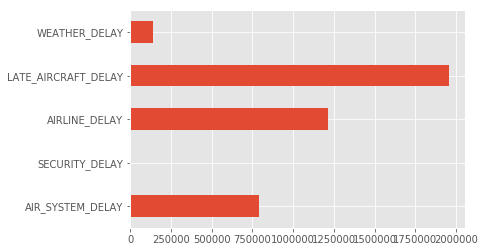

In [8]:
plt.style.use('ggplot')

df_aggr[['AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY', 
    'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']].plot(kind='barh')

In [10]:
df_count = df[['DEPARTURE_DELAY','ARRIVAL_DELAY','AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY', 
    'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']][df > 0].count()
df_count

DEPARTURE_DELAY        60971
ARRIVAL_DELAY          67205
AIR_SYSTEM_DELAY       33673
SECURITY_DELAY           118
AIRLINE_DELAY          36415
LATE_AIRCRAFT_DELAY    39452
WEATHER_DELAY           3346
dtype: int64

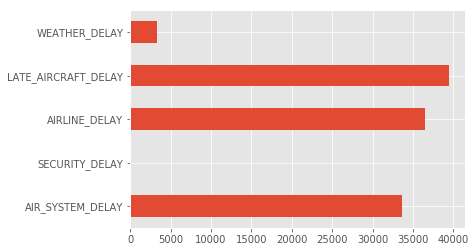

In [11]:
df_count[['AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY', 
    'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']].plot(kind='barh')

Summary statistics on the type of delays.

In [12]:
np.set_printoptions(suppress=True)
pd.options.display.float_format = '{:.2f}'.format
print(df[['DEPARTURE_DELAY','ARRIVAL_DELAY','AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY', 
    'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']].describe())

       DEPARTURE_DELAY  ARRIVAL_DELAY  AIR_SYSTEM_DELAY  SECURITY_DELAY  \
count         67205.00       67205.00          67205.00        67205.00   
mean             58.31          61.12             11.75            0.04   
std              64.33          60.40             23.88            1.57   
min             -20.00          16.00              0.00            0.00   
25%              21.00          25.00              0.00            0.00   
50%              41.00          41.00              1.00            0.00   
75%              76.00          75.00             17.00            0.00   
max            1496.00        1498.00            676.00          196.00   

       AIRLINE_DELAY  LATE_AIRCRAFT_DELAY  WEATHER_DELAY  
count       67205.00             67205.00       67205.00  
mean           18.11                29.13           2.09  
std            41.57                47.31          16.72  
min             0.00                 0.00           0.00  
25%             0.00         

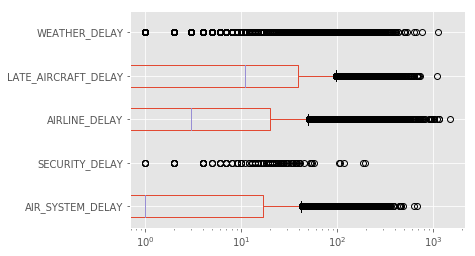

In [13]:
ax = df[['AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY', 
    'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']].boxplot(vert=False)
ax.set_xscale('log')

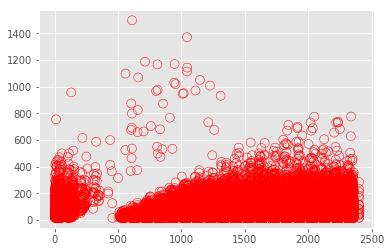

In [14]:
plt.scatter(df['DEPARTURE_TIME'],df['ARRIVAL_DELAY'], s=80, facecolors='none', edgecolors='r')
plt.show()

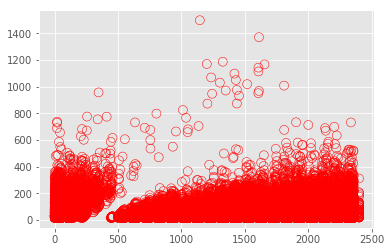

In [15]:
plt.scatter(df['ARRIVAL_TIME'],df['ARRIVAL_DELAY'], s=80, facecolors='none', edgecolors='r')
plt.show()

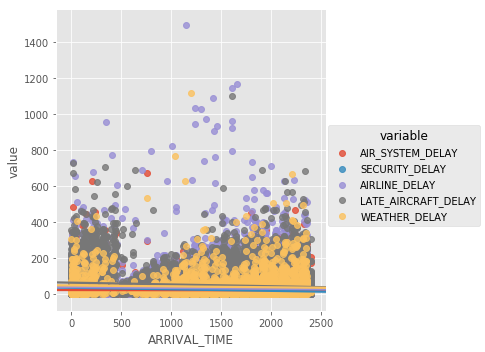

In [16]:
cmap = sns.diverging_palette(220,10,as_cmap=True)

df_long = pd.melt(df, id_vars=['ARRIVAL_TIME'], value_vars=['AIR_SYSTEM_DELAY','SECURITY_DELAY',
                                                                          'AIRLINE_DELAY','LATE_AIRCRAFT_DELAY',
                                                                          'WEATHER_DELAY'])
sns.lmplot('ARRIVAL_TIME','value',data=df_long[df_long.value > 0],
           hue='variable')
plt.show()

In [17]:
df_long.head(10)

,ARRIVAL_TIME,variable,value
0,923.00,AIR_SYSTEM_DELAY,7.00
1,1002.00,AIR_SYSTEM_DELAY,0.00
2,1554.00,AIR_SYSTEM_DELAY,0.00
3,1123.00,AIR_SYSTEM_DELAY,97.00
4,1013.00,AIR_SYSTEM_DELAY,0.00
5,840.00,AIR_SYSTEM_DELAY,1.00
6,1801.00,AIR_SYSTEM_DELAY,0.00
7,1116.00,AIR_SYSTEM_DELAY,0.00
8,1153.00,AIR_SYSTEM_DELAY,18.00
9,1156.00,AIR_SYSTEM_DELAY,0.00
